In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from utils.fuzzy_utils import de_A, u_A
from Simulacion import Simulacion_CLD

1. La planta

2. Controlador (CLD)

Se definen los valores difusos y las reglas difusas.

In [16]:
# Valores difusos trapezoidales
# TODO dejar la implementacion que quede más simple de usar

Fuzzy_Values = {
    "Ng" : (-1.0, -1.0, -0.8, -0.6),
    "Nm" : (-0.8, -0.6, -0.4, -0.2),
    "Np" : (-0.5, -0.4, -0.2, -0.1),
    "Ni" : (-0.2, -0.1, 0.0, 0.0),
    "Ce" : (-0.1, 0.0, 0.0, 0.1),
    "Pi" : (0.0, 0.0, 0.1, 0.2),
    "Pp" : (0.1, 0.2, 0.4, 0.5),
    "Pm" : (0.4, 0.4, 0.6, 0.8),
    "Pg" : (0.6, 0.8, 1.0, 1.0)
}

In [17]:
# Se definen conjuntos de_A necesarios
All_Fuzzy_Values = Fuzzy_Values.copy()
All_Fuzzy_Values["de_A_Ng_Pp"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Pp"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Ng_Np"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Np"])
All_Fuzzy_Values["de_A_Np_Pi"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Pm_Pg"] = de_A(Fuzzy_Values["Pm"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Np_Pg"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Pp_Pg"] = de_A(Fuzzy_Values["Pp"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])

# Función para crear un vector con los grados de pertenencia a cierto conjunto en un dominio dado.
pertenencia_conjunto = lambda A, dominio: np.array(list(map(lambda x: u_A(A, x), dominio)))

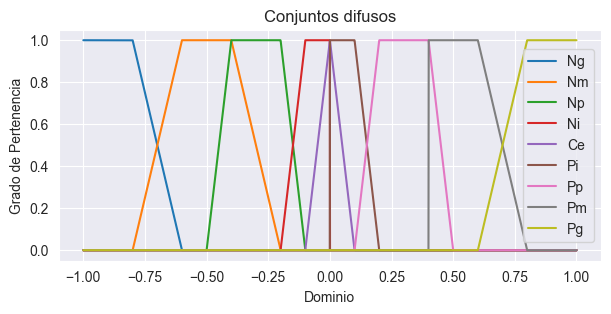

In [18]:
# Gráfico de conjuntos difusos.
dominio = np.linspace(-1, 1, 2000)
fig = plt.figure(figsize=(7, 3))
for name, A in Fuzzy_Values.items():
    plt.plot(dominio, pertenencia_conjunto(A, dominio), label=name)
plt.title("Conjuntos difusos")
plt.xlabel("Dominio")
plt.ylabel("Grado de Pertenencia")
plt.legend()
plt.show()

In [19]:
# Mapa de reglas en base a 2 variables difusas: EP y TP. Salida es deltaH.
mapa_reglas = {}

# Regla 1
mapa_reglas[(All_Fuzzy_Values["Ng"], All_Fuzzy_Values["de_A_Ng_Pp"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 2
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Nm"], All_Fuzzy_Values["de_A_Ng_Np"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 3
mapa_reglas[(All_Fuzzy_Values["Np"], All_Fuzzy_Values["de_A_Np_Pi"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 4
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 5
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 6
mapa_reglas[(All_Fuzzy_Values["de_A_Ni_Pi"], All_Fuzzy_Values["Ce"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 7
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 8
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 9
mapa_reglas[(All_Fuzzy_Values["Pp"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 10
mapa_reglas[(All_Fuzzy_Values["de_A_Pm_Pg"], All_Fuzzy_Values["de_A_Pp_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 11
mapa_reglas[(All_Fuzzy_Values["Pg"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas), end=", ")
# Regla 12
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 13
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 14
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 15
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 16
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Np"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 17
mapa_reglas[(All_Fuzzy_Values["de_A_Pp_Pg"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas))

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17


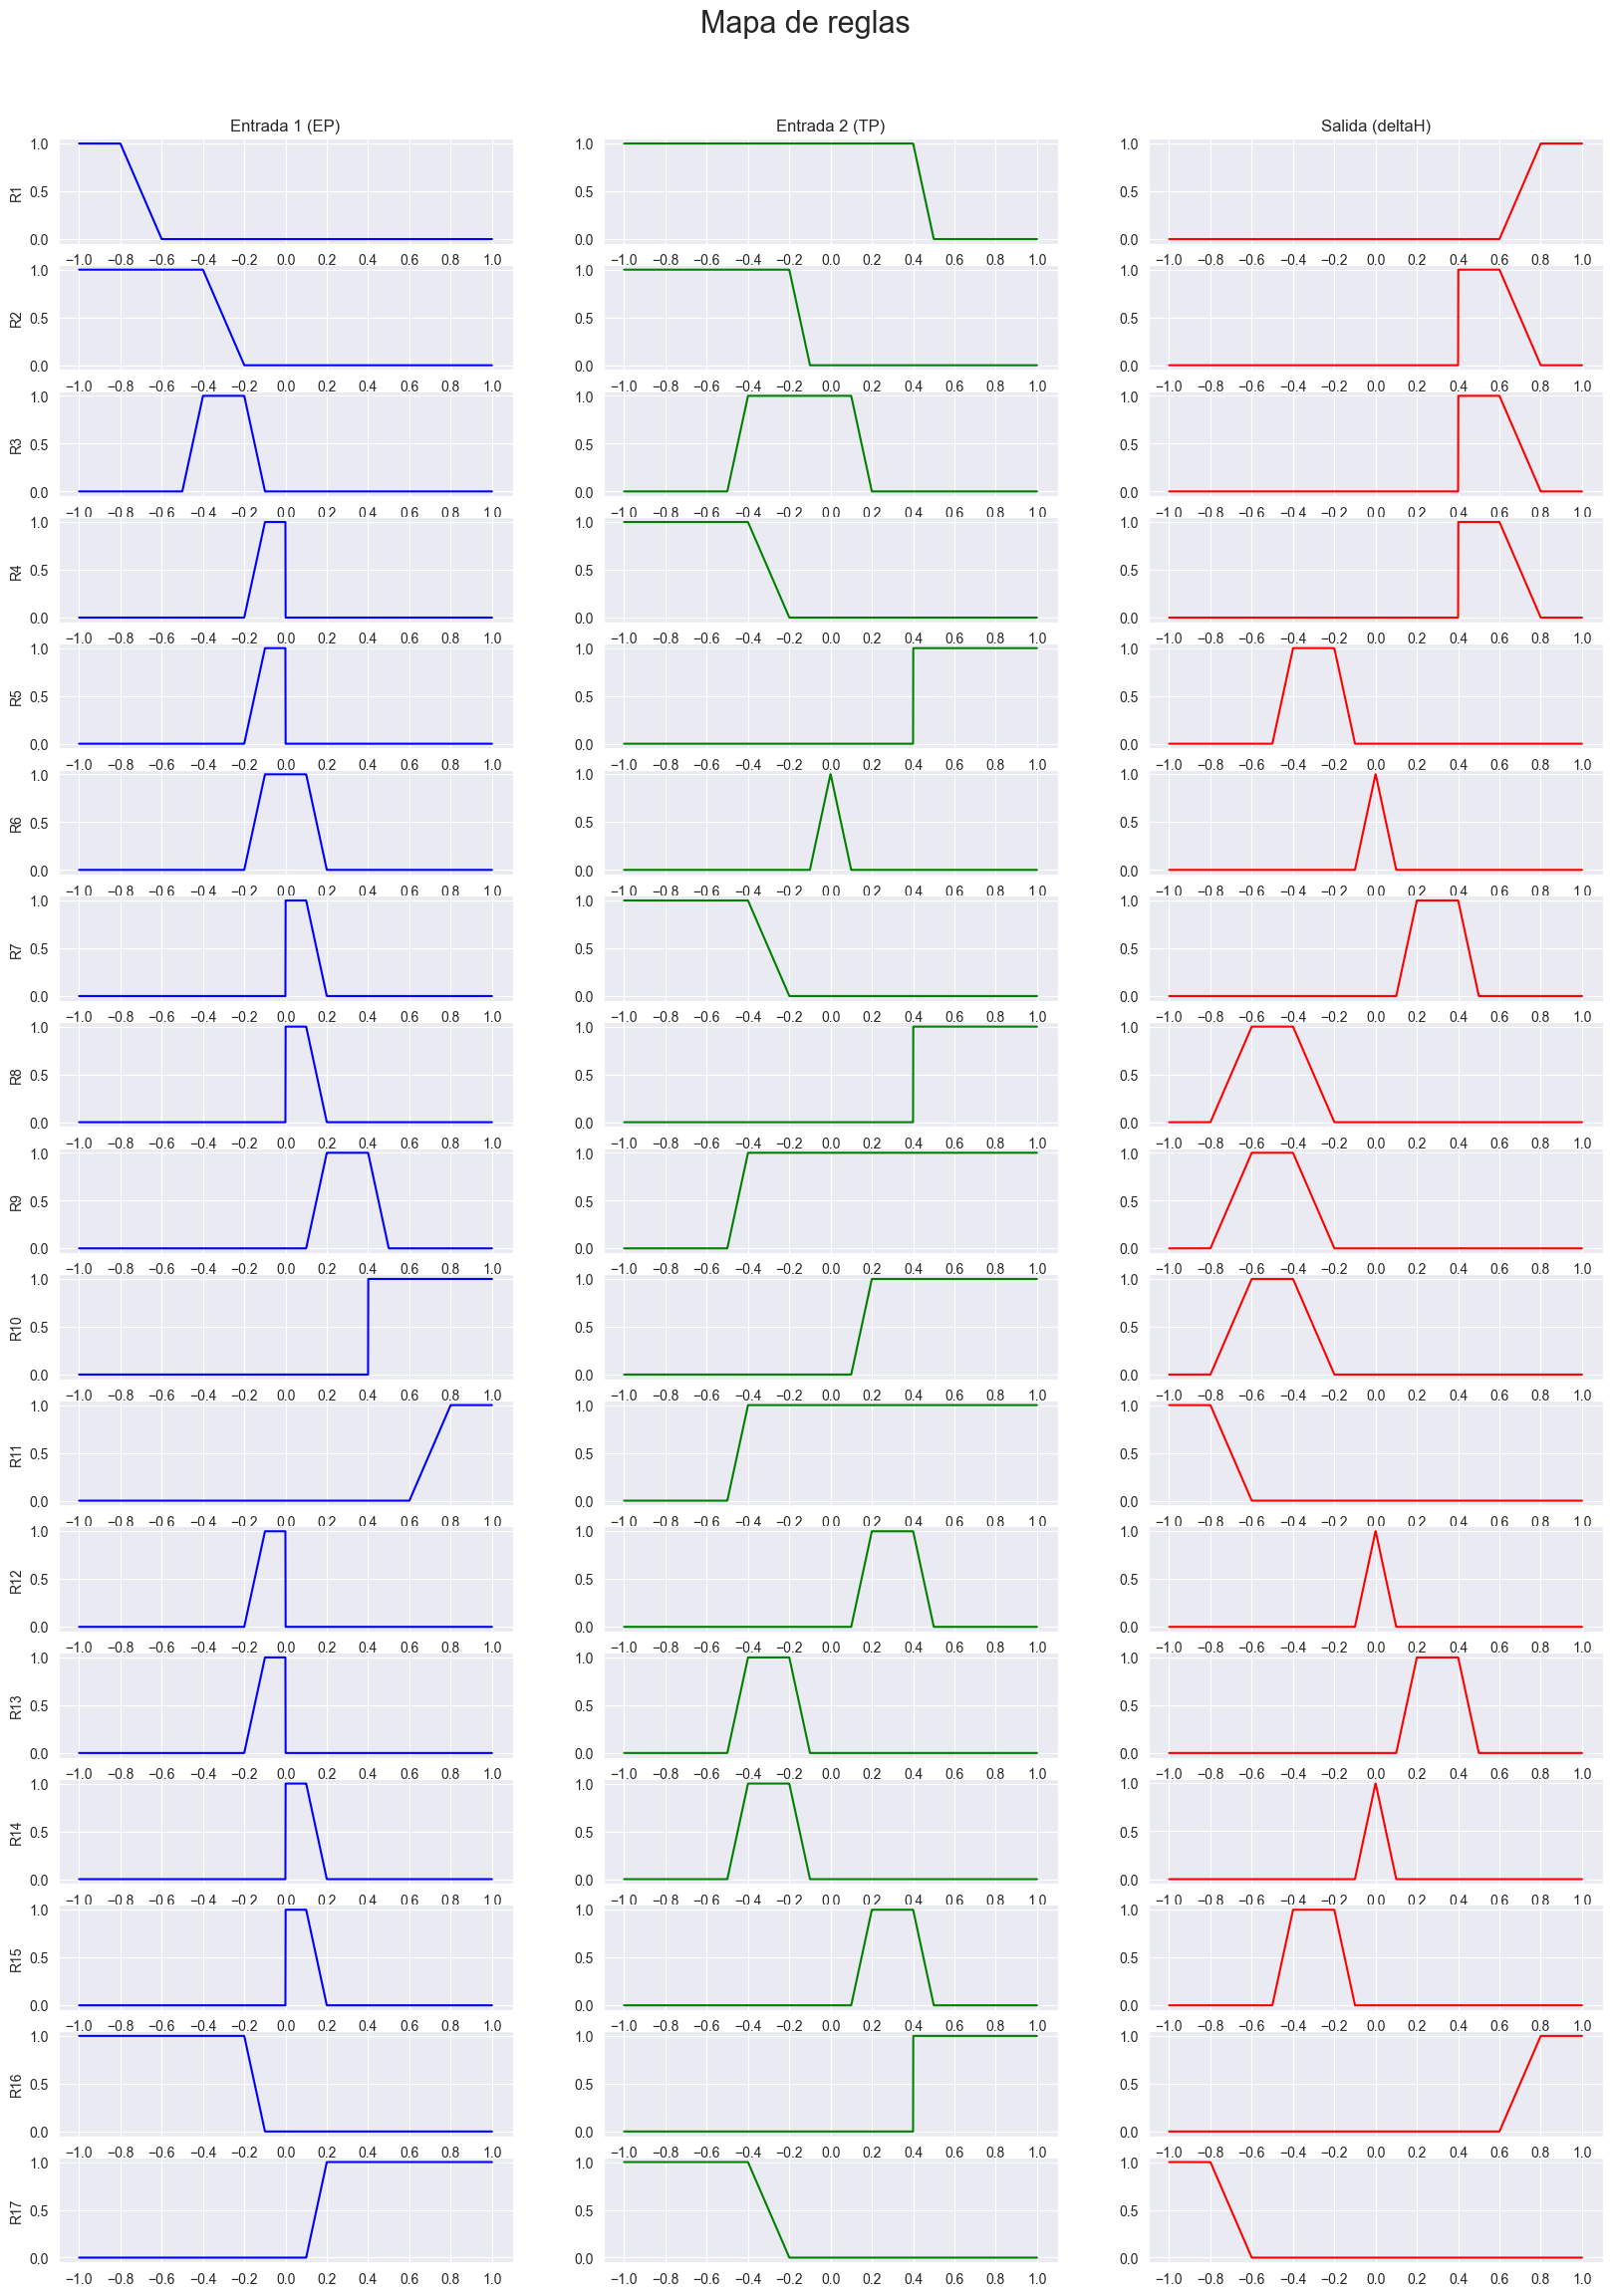

In [20]:
# Gráfico de reglas difusas
dominio = np.linspace(-1, 1, 2000)
grafico_conjunto = lambda C: np.array(list(map(lambda x: u_A(C, x), dominio)))

fig, ax = plt.subplots(nrows=17, ncols=3, figsize=(20,26))
for i, (A, B) in enumerate(mapa_reglas.keys()):
    ax[i, 0].set_ylabel(f"R{i+1}")
    ax[i, 0].plot(dominio, grafico_conjunto(A), color="b")
    ax[i, 1].plot(dominio, grafico_conjunto(B), color="g")
    ax[i, 2].plot(dominio, grafico_conjunto(mapa_reglas[(A, B)]), color="r")

    # # E1
    # min_ = -1
    # max_ = -0.6
    # ax[i, 0].axvline(min_)
    # ax[i, 0].axvline(max_)

    # # E2
    # min_ = -0.8
    # max_ = -0.2
    # ax[i, 1].axvline(min_)
    # ax[i, 1].axvline(max_)

    plt.sca(ax[i, 0])
    plt.xticks(np.linspace(-1,1,11))
    plt.sca(ax[i, 1])
    plt.xticks(np.linspace(-1,1,11))
    plt.sca(ax[i, 2])
    plt.xticks(np.linspace(-1,1,11))

ax[0,0].set_title("Entrada 1 (EP)")
ax[0,1].set_title("Entrada 2 (TP)")
ax[0,2].set_title("Salida (deltaH)")

# Use the pyplot interface to change just one subplot...


plt.subplots_adjust(top=0.93)  # Parámetro que hace que se vea bien
plt.suptitle("Mapa de reglas", fontsize=22)

plt.show()


In [21]:
# dataframe que contendra el mapa de reglas E2 columnas E1 Index
map_rules = pd.DataFrame(columns=Fuzzy_Values.keys(), index=Fuzzy_Values.keys())
# diccionario que intercambia las llaves y valores del Fuzzy_Values, conjunto trapecio -> nombre conjunto
inverted_Fuzzy_Values = {value: key for key, value in Fuzzy_Values.items()}
# Se itera por E1
for E1 in map_rules.index:
    # Se itera por E2
    for E2 in map_rules.columns:
        # Se extraen los conjuntos trapezoidales
        conjunto_E1 = Fuzzy_Values[E1]
        conjunto_E2 = Fuzzy_Values[E2]
        # se crea la lista donde ira el conjunto resultante de la activacion de ambas entradas
        map_rules.loc[E1,E2] = []
        # Se itera por regla
        for i, (regla_EP, regla_TP) in enumerate(mapa_reglas.keys()):
            # Se busca que los elementos E1 y E2 no tengan intersección vacía con las reglas 
            con_E1 =  ( min(regla_EP) <= min(conjunto_E1) < max(regla_EP) ) or ( min(regla_EP) < max(conjunto_E1) <= max(regla_EP) )
            con_E2 =  ( min(regla_TP) <= min(conjunto_E2) < max(regla_TP) ) or ( min(regla_TP) < max(conjunto_E2) <= max(regla_TP) )
            # caso donde hay intersección
            if con_E1 and con_E2:
                # Se extraen los elementos de la celda
                lista = map_rules.loc[E1,E2] 
                # Se extraen el nombre del conjunto trapezoidal 
                conjunto = inverted_Fuzzy_Values[mapa_reglas[regla_EP, regla_TP]]
                # Se añade a la lista
                lista.append(inverted_Fuzzy_Values[mapa_reglas[regla_EP, regla_TP]])
                # Se reescribe el valor de la celda
                map_rules.loc[E1,E2] = lista

map_rules

,Ng,Nm,Np,Ni,Ce,Pi,Pp,Pm,Pg
Ng,"[Pg, Pm]","[Pg, Pm]","[Pg, Pm]","[Pg, Pm]",[Pg],[Pg],"[Pg, Pg]","[Pg, Pg]",[Pg]
Nm,"[Pg, Pm]","[Pg, Pm, Pm]","[Pg, Pm, Pm]","[Pg, Pm, Pm]","[Pg, Pm]","[Pg, Pm]","[Pg, Pm, Pg]","[Pg, Pg]",[Pg]
Np,"[Pm, Pm]","[Pm, Pm, Pm, Pp]","[Pm, Pm, Pm, Pp]","[Pm, Pm, Ce, Pp]","[Pm, Ce]","[Pm, Ce, Ce]","[Pm, Np, Ce, Pg]","[Np, Ce, Pg]","[Np, Pg]"
Ni,[Pm],"[Pm, Pm, Pp]","[Pm, Pm, Pp]","[Pm, Ce, Pp]","[Pm, Ce]","[Pm, Ce, Ce]","[Pm, Np, Ce, Pg]","[Np, Ce, Pg]","[Np, Pg]"
Ce,"[Pm, Pp]","[Pm, Pp, Pp, Ce]","[Pm, Pp, Pp, Ce]","[Ce, Pp, Ce]",[Ce],"[Ce, Ce, Np]","[Np, Nm, Ce, Np]","[Np, Nm, Ce, Np]","[Np, Nm]"
Pi,"[Pp, Ng]","[Pp, Nm, Ce, Ng]","[Pp, Nm, Ce, Ng]","[Ce, Nm, Ce]","[Ce, Nm]","[Ce, Nm, Np]","[Nm, Nm, Np]","[Nm, Nm, Np]","[Nm, Nm]"
Pp,"[Pp, Ng]","[Pp, Nm, Ce, Ng]","[Pp, Nm, Ce, Ng]","[Ce, Nm, Ce]","[Ce, Nm]","[Ce, Nm, Nm, Np]","[Nm, Nm, Nm, Np]","[Nm, Nm, Nm, Np]","[Nm, Nm, Nm]"
Pm,[Ng],"[Nm, Ng, Ng]","[Nm, Ng, Ng]","[Nm, Ng]","[Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]"
Pg,[Ng],"[Ng, Ng]","[Ng, Ng]",[Ng],[Ng],"[Nm, Ng]","[Nm, Ng]","[Nm, Ng]","[Nm, Ng]"


In [22]:
# Se definen condiciones iniciales y restricciones para los valores difusos.
T = 50  # (s) Tiempo de simulación
fs = 1  # (Hz) frecuencia de muestreo de simulación
rango_EP = [-15, 15]  # Rango de error de presión
rango_TP = [-15, 15]  # Rango de tasa de error de presión
rango_deltaH = [-15, 15]  # Rango de deltaH
K = 0.6  # Constante P=K*H
P_obj = 750  # (Pa) Presión objetivo
P_inicial = 830 # (Pa) Presión inicial
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


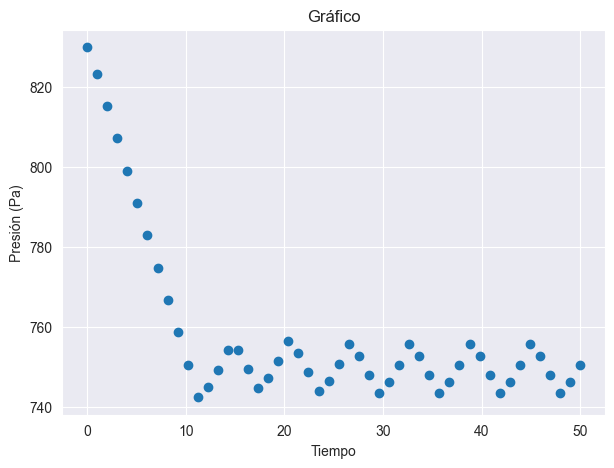

In [23]:
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()

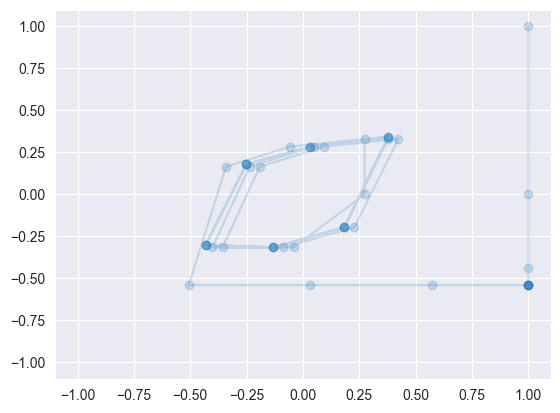

In [24]:
data_participacion = pd.read_csv("experimento1.csv", index_col=0)
# data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
plt.plot(data_participacion["EP"], data_participacion["TP"], "-o", alpha=0.2)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

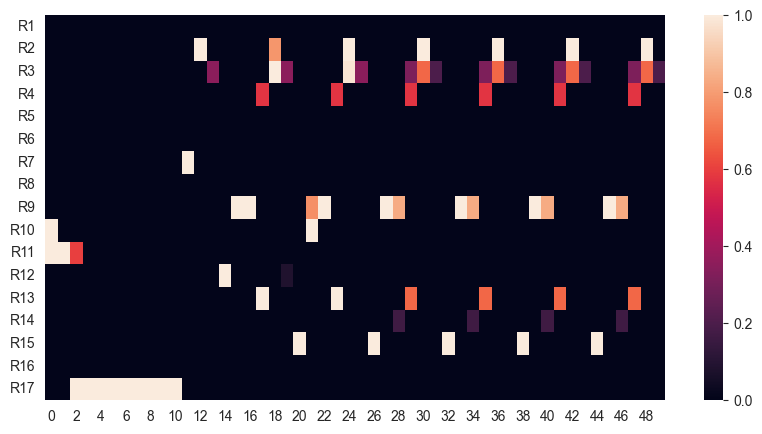

In [25]:
data_participacion = pd.read_csv("regla_participacion_experimento1.csv", index_col=0)
plt.figure(figsize=(10,5))
sns.heatmap(data_participacion.T)
plt.show()

## CLD Exacto

In [26]:
# Se definen condiciones iniciales y restricciones para los valores difusos.
T = 50  # (s) Tiempo de simulación
fs = 1  # (Hz) frecuencia de muestreo de simulación
rango_EP = [-15, 15]  # Rango de error de presión
rango_TP = [-15, 15]  # Rango de tasa de error de presión
rango_deltaH = [-15, 15]  # Rango de deltaH
K = 0.6  # Constante P=K*H
C = 0.01
P_obj = 750  # (Pa) Presión objetivo
P_inicial = 830 # (Pa) Presión inicial
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, C=C, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="exacto")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t)+0.01*dP(t-1) usando lógica difusa.


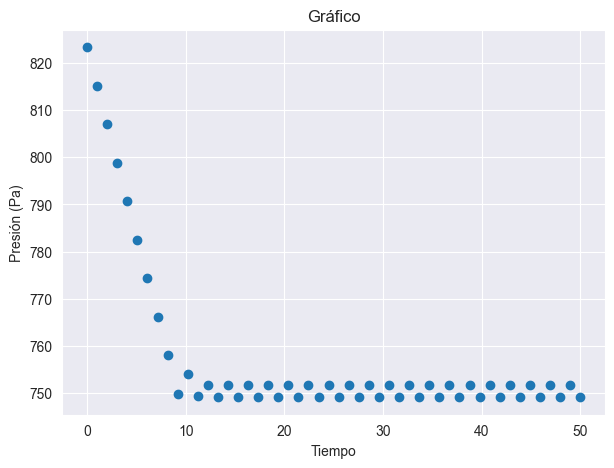

In [27]:
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento2.csv")
CLD.plot_sim()

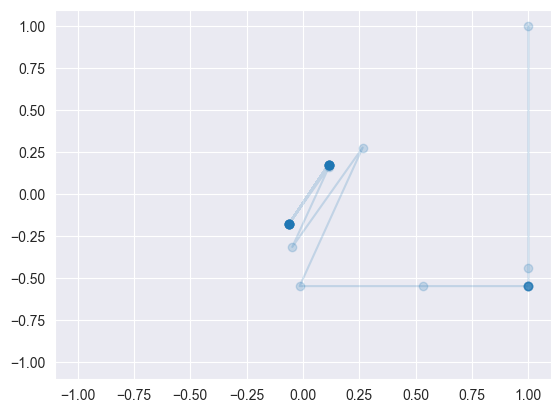

In [28]:
data_participacion = pd.read_csv("experimento2.csv", index_col=0)
# data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
plt.plot(data_participacion["EP"], data_participacion["TP"], "-o", alpha=0.2)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

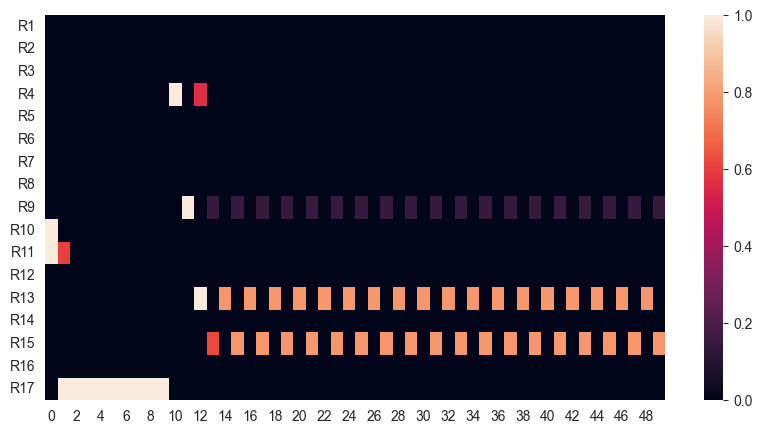

In [29]:
data_participacion = pd.read_csv("regla_participacion_experimento2.csv", index_col=0)
plt.figure(figsize=(10,5))
sns.heatmap(data_participacion.T)
plt.show()

# Proceso de eliminación de Reglas